# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.084334e+01     8.387186e+00
 * time: 0.0018780231475830078
     1     3.059044e+01     5.659420e+00
 * time: 0.00802302360534668
     2     2.410139e+01     9.309557e+00
 * time: 0.015265941619873047
     3     1.148603e+01     2.300270e+00
 * time: 0.023504018783569336
     4     1.093439e+01     3.134475e+00
 * time: 0.02849602699279785
     5     1.042950e+01     2.223277e+00
 * time: 0.03345799446105957
     6     9.775188e+00     1.719785e+00
 * time: 0.03849601745605469
     7     9.044235e+00     1.705972e+00
 * time: 0.07678103446960449
     8     8.492182e+00     1.065498e+00
 * time: 0.08041191101074219
     9     8.183925e+00     7.419798e-01
 * time: 0.08397102355957031
    10     8.031570e+00     4.864524e-01
 * time: 0.08772492408752441
    11     7.960119e+00     4.429874e-01
 * time: 0.09117794036865234
    12     7.922209e+00     8.455495e-01
 * time: 0.09404301643371582
    13     7.889287e+00     3.979971e-01
 * t

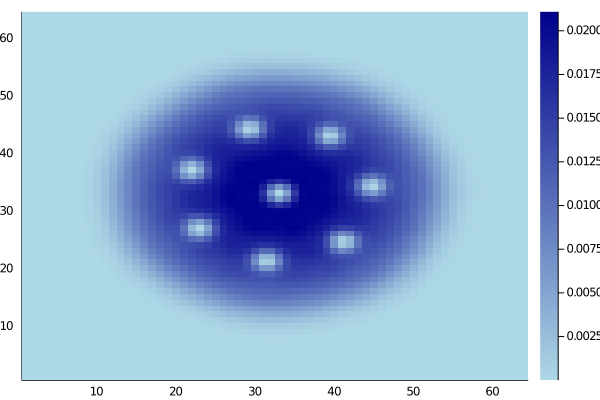

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)